In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
data = Path('data/data_for_model')

In [2]:
gdf = gpd.read_feather(f'{data}/grid.feather')

In [6]:
index_attr=pd.read_feather(f'{data}/index_attrs_yearly.feather')

# Starts Here

In [7]:
index_attr

,idx,year,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,albedo_mean_,...,bsc_sum,BUILDING_HEIGHT_MIN_mean,BUILDING_HEIGHT_MIN_median,BUILDING_HEIGHT_MIN_sum,parcel_boundary_count,floor_number_sum,floor_number_mean,floor_number_median,floor_number_mode,SUBCLASS_mode
0,4.782988e+11,2013,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
1,4.782988e+11,2014,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
2,4.782988e+11,2015,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
3,4.782988e+11,2016,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
4,4.782988e+11,2017,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740763,4.816188e+11,2016,0.567927,-1.0,-0.740606,0.311182,-0.776845,10.0,0.116935,-0.686577,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740764,4.816188e+11,2017,0.567927,-1.0,-0.752903,0.271014,-0.776845,10.0,0.116935,-0.686577,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740765,4.816188e+11,2018,0.567927,-1.0,-0.743482,0.316056,-0.776845,10.0,0.116935,-0.686577,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740766,4.816188e+11,2019,0.567927,-1.0,-0.718001,0.431597,-0.776845,10.0,0.116935,-0.686577,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0


In [8]:
grid = gpd.read_feather(f'{data}/grid.feather')

In [9]:
grid.head()

,id_x,title,idx,ward_num,name,geometry
0,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5..."
1,"(47966, 87513, 18)","XYZ tile (47966, 87513, 18)",4.796688e+11,2,02L,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
2,"(47967, 87513, 18)","XYZ tile (47967, 87513, 18)",4.796788e+11,2,02L,"POLYGON ((281580.147 5678054.020, 281584.220 5..."
3,"(47968, 87513, 18)","XYZ tile (47968, 87513, 18)",4.796888e+11,2,02L,"POLYGON ((281676.040 5678049.937, 281680.111 5..."
4,"(47969, 87513, 18)","XYZ tile (47969, 87513, 18)",4.796988e+11,2,02L,"POLYGON ((281771.933 5678045.856, 281776.002 5..."


Merging grids and attributes

In [10]:
all_grid = pd.merge(left=grid, right=index_attr, on=['idx'])

In [11]:
all_grid

,id_x,title,idx,ward_num,name,geometry,year,albedo_max_,albedo_min_,ndbi_mean_,...,bsc_sum,BUILDING_HEIGHT_MIN_mean,BUILDING_HEIGHT_MIN_median,BUILDING_HEIGHT_MIN_sum,parcel_boundary_count,floor_number_sum,floor_number_mean,floor_number_median,floor_number_mode,SUBCLASS_mode
0,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5...",2013,0.180248,-1.0,-0.296063,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
1,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5...",2014,0.180248,-1.0,-0.261668,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
2,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5...",2015,0.180248,-1.0,-0.293274,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
3,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5...",2016,0.180248,-1.0,-0.251481,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
4,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5...",2017,0.180248,-1.0,-0.271959,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740763,"(48095, 87941, 18)","XYZ tile (48095, 87941, 18)",4.809588e+11,12,12I,"POLYGON ((292207.200 5636447.898, 292211.054 5...",2016,-1.000000,-1.0,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740764,"(48095, 87941, 18)","XYZ tile (48095, 87941, 18)",4.809588e+11,12,12I,"POLYGON ((292207.200 5636447.898, 292211.054 5...",2017,-1.000000,-1.0,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740765,"(48095, 87941, 18)","XYZ tile (48095, 87941, 18)",4.809588e+11,12,12I,"POLYGON ((292207.200 5636447.898, 292211.054 5...",2018,-1.000000,-1.0,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
740766,"(48095, 87941, 18)","XYZ tile (48095, 87941, 18)",4.809588e+11,12,12I,"POLYGON ((292207.200 5636447.898, 292211.054 5...",2019,-1.000000,-1.0,-1.000000,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0


In [12]:
all_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 740768 entries, 0 to 740767
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id_x                        740768 non-null  object  
 1   title                       740768 non-null  object  
 2   idx                         740768 non-null  float64 
 3   ward_num                    740704 non-null  object  
 4   name                        740688 non-null  object  
 5   geometry                    740768 non-null  geometry
 6   year                        740768 non-null  int64   
 7   albedo_max_                 740768 non-null  float64 
 8   albedo_min_                 740768 non-null  float64 
 9   ndbi_mean_                  740768 non-null  float64 
 10  ndbi_max_                   740768 non-null  float64 
 11  mndwi_mean_                 740768 non-null  float64 
 12  ndbi_count_                 740768 non-null  float

In [13]:
#If we have to select and look at only one years data
#all_2017 = all_grid[all_grid.year == 2017]

In [14]:
#I we have to save only selected years data
#all_2017.to_file('all_grids_2017.geojson', driver='GeoJSON')

In [15]:
all_grid_grouped= all_grid.copy()

### Shanon's Entropy Index
Shannon’s entropy method is widely used to measure the degree or intensity of urban sprawl
Entropy is conceptually appropriate to measure the disorder of urban expansion. Urban
sprawl’s intensity increases as built-up areas disperse widely across an entire city rather
than concentrated in a restricted area. [Reference](https://www.mdpi.com/2071-1050/13/2/632/pdf)

In [16]:
all_grid_grouped['yr_id_shapesum']=all_grid_grouped.groupby(["id_x", "year"])["SHAPE_Area_y_count"].transform(sum)

In [17]:
all_grid_grouped.yr_id_shapesum

0         0
1         0
2         0
3         0
4         0
         ..
740763    0
740764    0
740765    0
740766    0
740767    0
Name: yr_id_shapesum, Length: 740768, dtype: int64

In [18]:
all_grid_grouped.yr_id_shapesum.sum()

3376067

In [19]:
all_grid_grouped.yr_id_shapesum.value_counts()

0      445884
1       29956
2       18027
12      13169
13      13124
        ...  
91          1
142         1
57          1
103         1
54          1
Name: yr_id_shapesum, Length: 82, dtype: int64

In [20]:
#all_grid_grouped.to_file(f'{data}/all_grid_grouped.geojson', driver='GeoJSON')

## calculate shanons entropy index

In [22]:
all_grid_grouped['entropy']=((-all_grid_grouped.yr_id_shapesum/all_grid_grouped.yr_id_shapesum.sum()) * np.log(all_grid_grouped.yr_id_shapesum/all_grid_grouped.yr_id_shapesum.sum()) )

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
all_grid_grouped.entropy.value_counts()

0.000004    29956
0.000008    18027
0.000045    13169
0.000048    13124
0.000038    13091
            ...  
0.000284        1
0.000278        1
0.000424        1
0.000829        1
0.000317        1
Name: entropy, Length: 81, dtype: int64

In [24]:
#Checking entropy for one year
all_2017 = all_grid_grouped[all_grid_grouped.year == 2017]

In [25]:
all_2017.entropy.sum()

1.560487495505876

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


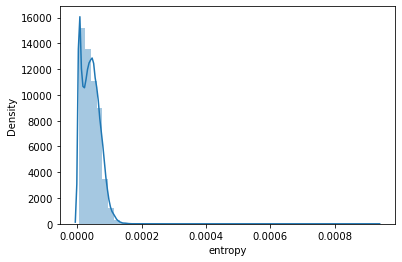

In [26]:
ax = sns.distplot(all_2017.entropy.ravel(), axlabel='entropy')
ax = plt.gca()

# Calculate BBC - currently with the grid area

In [27]:
all_grid_grouped['bbc'] = (all_grid_grouped.SHAPE_Area_y_sum/all_grid_grouped.geometry.area)

In [28]:
all_grid_grouped.bbc.max()

59.73415414094398

In [29]:
all_grid_grouped.to_feather(f'{data}/landsat_morphology.feather')

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [30]:
all_grid_grouped.to_file(f'{data}/landsat_morphology.geojson', driver='GeoJSON')